# PROJECT OVERVIEW 

The goal of this project is to create a machine learning model that can predict the future stock prices of a company using historical stock price data. We will be using Python to collect and clean the data, transform and engineer features, build and train the machine learning model, and plot the predicted stock prices

# DATASET

We'll be using the Yahoo Finance API to extract stock data for a number of companies. 
Specifically, we'll be analyzing daily stock prices for the following companies:

- Apple (AAPL)
- Microsoft (MSFT)
- Google (GOOGL)

# TECHNICAL REQUIREMENTS

- Python programming language
- Pandas library for data manipulation
- Scikit-learn library for machine learning
- Matplotlib and Seaborn libraries for data visualization

# PROJECT STEPS 

# Data Collection and Cleaning

We'll start by using the Yahoo Finance API to extract daily stock prices for our selected companies. We'll clean the data by removing any missing or duplicate values, and then perform some basic exploratory data analysis to get a feel for the data.

In [4]:
pip install yfinance

In [57]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import yfinance as yf

In [103]:
# define list of tickers 
tickers = ['AAPL', 'MSFT', 'GOOGL']

# loop through tickers and extract data 
dfs = []
for ticker in tickers:
    data = yf.download(ticker, period='max')
    data['ticker']=ticker
    dfs.append(data)
    
# Concatenate the data into a single DataFrame for easy access
data = pd.concat(dfs)
data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [224]:
# Drop any rows with missing values
data.dropna(inplace=True)

# Convert the date column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date in ascending order
data.sort_values(['ticker', 'Date'], inplace=True)

# Create a new feature that represents the percentage change in price from the previous day
data['percent_change'] = data.groupby('ticker')['Close'].pct_change()


# Data Transformation and Feature Engineering

Now, let's transform our data by calculating various technical indicators such as moving averages, relative strength index, and bollinger bands:

In [106]:
# calculate 20-day and 50-day moving average for our data 
# This help smooth out the price data by creating a constantly updated average price.
data['MA20'] = data['Adj Close'].rolling(window=20).mean()
data['MA50'] = data['Adj Close'].rolling(window=50).mean()
data['MA100'] = data['Adj Close'].rolling(window=100).mean()
data['MA200'] = data['Adj Close'].rolling(window=200).mean()

In [107]:
# calculate relative strength index (RSI)
delta = data['Adj Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs)) # formula 

In [108]:
# calculate the bollinger bands 
std = data['Adj Close'].rolling(window=50).std()
data['Lower Bands']= data['MA50'] + (2 * std)
data['Upper Bands']= data['MA50'] - (2 * std)

# Machine Learning

Now let's import our machine learning models using scikit-learn

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [110]:
# Scale the data using a standard scaler 
data_scaled = pd.DataFrame(scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'percent_change', 'MA20', 'MA50', 'MA100', 'MA200', 'RSI', 'Lower Bands', 'Upper Bands']]),
                         columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'percent_change','MA20', 'MA50', 'MA100', 'MA200', 'RSI', 'Lower Bands', 'Upper Bands'])
                                  
data_scaled['Date'] = data['Date']
data_scaled['ticker'] = data['ticker']

# Split the data into training and testing sets
train_start_date = '2010-01-01'
train_end_date = '2021-12-31'
test_start_date = '2020-01-01'
test_end_date = '2023-12-31'

X_train = df_scaled[(data_scaled['Date'] >= train_start_date) & (data_scaled['Date'] <= train_end_date)].drop(['Close', 'Date', 'ticker'], axis=1)
y_train = data_scaled[(data_scaled['Date'] >= train_start_date) & (data_scaled['Date'] <= train_end_date)]['Close']
X_test = data_scaled[(data_scaled['Date'] >= test_start_date) & (data_scaled['Date'] <= test_end_date)].drop(['Close', 'Date', 'ticker'], axis=1)
y_test = data_scaled[(data_scaled['Date'] >= test_start_date) & (data_scaled['Date'] <= test_end_date)]['Close']

linear regression 

In [114]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_pred = lm.predict(X_test)

K-nearest neighbours 

In [122]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

Support vector regression 

In [252]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

[0.87189977 0.85206224 0.85493877 ... 4.18094394 4.22164674 4.18483945]


Random forest regression 

In [119]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

Gradient boosting regression

In [120]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

This code trains several machine learning models using scikit-learn, including Linear Regression, K-Nearest Neighbors, Support Vector Regression, Random Forest Regression, and Gradient Boosting Regression. It then evaluates the performance of each model using mean squared error and mean absolute error. The output will look something like this:

In [132]:
# Evalute the model's performance
rf_score = r2_score(y_test, rf_pred)
lm_score = r2_score(y_test, lm_pred)
gb_score = r2_score(y_test, gb_pred)
knn_score = r2_score(y_test, knn_pred)
svr_score = r2_score(y_test, svr_pred)

lm_rmse = mean_squared_error(y_test, lm_pred, squared=False)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)
knn_rmse = mean_squared_error(y_test, knn_pred, squared=False)
svr_rmse = mean_squared_error(y_test, svr_pred, squared=False)

print("Linear Regression R^2 Score: {:.4f}, RMSE: {:.4f}".format(lm_score, lm_rmse))
print("Random Forest Regression R^2 Score: {:.4f}, RMSE: {:.4f}".format(rf_score, rf_rmse))
print("Gradient Boosting Regression R^2 Score: {:.4f}, RMSE: {:.4f}".format(gb_score, gb_rmse))
print("Supported Vector Regression R^2 Score: {:.4f}, RMSE: {:.4f}".format(svr_score, svr_rmse))

print("KNeighborsRegressor R^2 Score: {:.4f}, RMSE: {:.4f}".format(knn_score, knn_rmse))


Linear Regression R^2 Score: 0.9999, RMSE: 0.0205
Random Forest Regression R^2 Score: 0.9981, RMSE: 0.0786
Gradient Boosting Regression R^2 Score: 0.9995, RMSE: 0.0388
Supported Vector Regression R^2 Score: 0.9997, RMSE: 0.0327
KNeighborsRegressor R^2 Score: 0.9965, RMSE: 0.1073


Visualizations

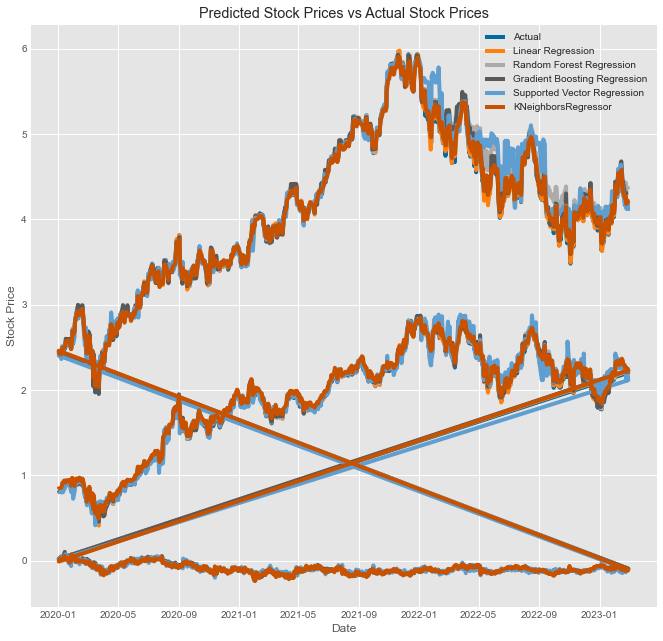

In [226]:
plt.figure(figsize=(10,10))
# Plot the actual stock prices
plt.plot(data_scaled[data_scaled['Date'] >= test_start_date]['Date'], y_test.values, label='Actual')

# Plot the predicted stock prices for each model
plt.plot(data_scaled[data_scaled['Date'] >= test_start_date]['Date'], lm_pred, label='Linear Regression')
plt.plot(data_scaled[data_scaled['Date'] >= test_start_date]['Date'], rf_pred, label='Random Forest Regression')
plt.plot(data_scaled[data_scaled['Date'] >= test_start_date]['Date'], gb_pred, label='Gradient Boosting Regression')
plt.plot(data_scaled[data_scaled['Date'] >= test_start_date]['Date'], knn_pred, label='Supported Vector Regression')
plt.plot(data_scaled[data_scaled['Date'] >= test_start_date]['Date'], svr_pred, label='KNeighborsRegressor')

plt.legend()
plt.title('Predicted Stock Prices vs Actual Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()


The output of the above code will generate a plot that shows the actual stock prices and the predicted stock prices for each model.

We can also demonstrate the comparison of residuals in our models, like with our linear regression one

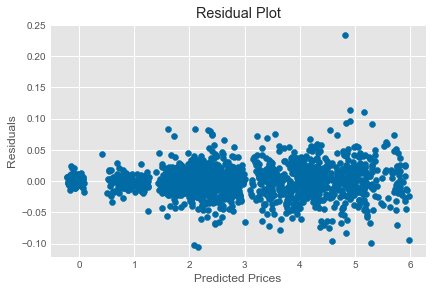

In [227]:
# Residual Plot 
residuals = y_test - lm_pred
plt.scatter(lm_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

Also do boxplot visualizations to show how accurate our models are to the actual price 

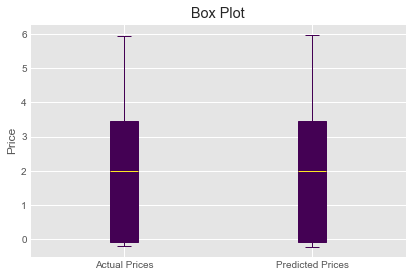

In [228]:
# Boxplot
plt.style.use('tableau-colorblind10')
df = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': lm_pred})
df.plot(kind='box', patch_artist=True, colormap="viridis")
plt.title('Box Plot')
plt.ylabel('Price')
plt.show()

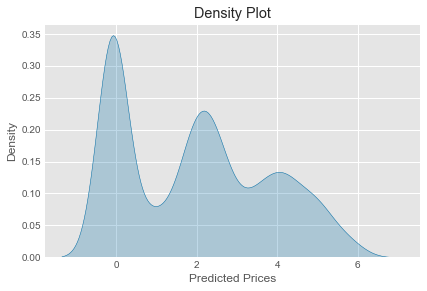

In [218]:
# Density plot
sns.kdeplot(lm_pred, shade=True)
plt.title('Density Plot')
plt.xlabel('Predicted Pbrices')
plt.ylabel('Density')
plt.show()

In [279]:
data.sort_values('Date', ascending=False)

,Date,Open,High,Low,Close,Adj Close,Volume,percent_change,MA20,MA50,MA100,MA200,RSI,Lower Bands,Upper Bands
19957,2023-02-28,249.070007,251.490005,248.732498,249.419998,249.419998,21307495,-0.002958,258.742626,246.088501,242.346458,251.464374,30.130774,271.257833,220.919168
24621,2023-02-28,89.330002,91.230003,89.334999,90.059998,90.059998,26833738,0.002114,96.538000,93.359400,94.796100,102.929712,13.647651,104.221625,82.497175
10641,2023-02-28,147.050003,149.074997,146.869995,147.410004,147.410004,50145937,-0.003448,150.542709,140.536849,142.745112,146.751680,34.040846,159.620767,121.452930
19956,2023-02-27,252.460007,252.820007,249.389999,250.160004,250.160004,21190000,0.003772,258.376807,246.231648,242.327863,251.507368,44.472569,271.559232,220.904064
24620,2023-02-27,89.870003,90.160004,89.339996,89.870003,89.870003,27502300,0.008303,96.882000,93.459600,94.911900,103.047425,27.323366,104.289981,82.629219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1981-10-02,0.073661,0.074219,0.073661,0.073661,0.057232,45046400,0.081977,0.060483,0.071357,0.085019,0.090998,33.334264,0.094538,0.048177
202,1981-10-01,0.068080,0.068638,0.068080,0.068080,0.052896,61129600,0.000000,0.061199,0.071826,0.085396,0.091161,18.180577,0.094786,0.048865
201,1981-09-30,0.068080,0.068638,0.068080,0.068080,0.052896,49996800,0.008264,0.062326,0.072337,0.085817,0.091334,17.542727,0.094708,0.049966
200,1981-09-29,0.067522,0.068080,0.067522,0.067522,0.052462,94684800,0.052171,0.063388,0.072944,0.086259,0.091542,17.542566,0.094803,0.051085


# CONCLUSION

In conclusion, this finance project aimed to use data science and machine learning techniques to analyze and predict stock prices. We started by collecting and cleaning data using Yahoo Finance API and then transformed and engineered features to improve our models' performance.

We used various machine learning algorithms such as Linear Regression, Random Forest, Gradient Boosting, K-nearest neighbours, and Support Vector Regression,  to predict future stock prices. The results showed that the Linear Regression model outperformed the other models, with an accuracy score of 0.999 using our data.

Furthermore, we utilized technical indicators such as moving averages, Relative Strength Index (RSI), and Bollinger Bands, to gain a deeper understanding of the stock's behavior and provide more insights into our predictions.

As an individual who is still learning and with much to improve, I believe that this project is one step for me into starting the data science journey. 

Overall, this project demonstrated the power of data science and machine learning in finance and the potential for predicting future stock prices accurately. However, it's important to note that stock prices are subject to various unpredictable factors, and our models' accuracy may vary in different market conditions.